# BladeX

## Tutorial 1: Prepare a blade 2D sectional profile -- Generate foils

In this tutorial we show how to generate a 2D planar sectional profile of a blade. Such section is typically represented by a foil. Here we present the BladeX modules responsible for generating the NACA 4- and 5- series profiles, as well as the possibility of generating custom profiles. After that we present the procedure of computing some basic attributes and geometric features of the foils.

First of all we import from BladeX the `NacaProfile` and `CustomProfile` classes, which are inherited from the `ProfileBase` class containing the methods responsible for computing all the basic attributes and geometric features of the foil.
We also import `numpy` and we set `matplotlib` for the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bladex import NacaProfile, CustomProfile

### Demonstration with NACA-4 profiles

We instantiate the NacaProfile class object **naca_0012** which corresponds to the NACA 0012 symmetric foil.
We generate the profile using 240 points, and cosine spacing for the coordinates distribution. Such data can be accessed through the attributes `digits`, `n_points`, `cosine_spacing`. We then plot the profile using the `plot` method.

The plot method includes several boolean arguments `profile`, `chord_line`, `camber_line`, and `ref_point` which allows us to add the corresponding plots to the same figure. Also there is additional argument `outfile` which enables us to save the figure if we pass a string to such argument.

If we did not pass any arguments to the method, then it plots using the default values which implies plotting the profile coordinates only.

NACA 0012 digits:  0012
NACA 0012 number of points:  240
NACA 0012 cosine spacing distribution:  True


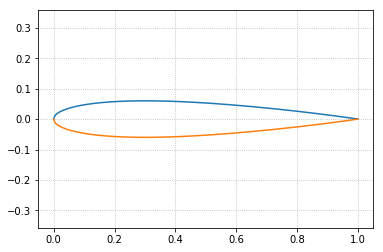

In [2]:
naca_0012 = NacaProfile(digits='0012', n_points=240, cosine_spacing=True)
print('NACA 0012 digits: ', naca_0012.digits)
print('NACA 0012 number of points: ', naca_0012.n_points)
print('NACA 0012 cosine spacing distribution: ', naca_0012.cosine_spacing)
naca_0012.plot()

Now we instantiate the object **naca_6409** which correspond to the NACA 6409 cambered foil. We generate the profile using 240 points, and cosine spacing for the coordinates distribution.

For the plot we also have the possibility to plot the profile manually if we seek to style the plot by our own. The profile coordinates can be accessed through the members `xup_coordinates`, `yup_coordinates`, `xdown_coordinates`, `ydown_coordinates`.

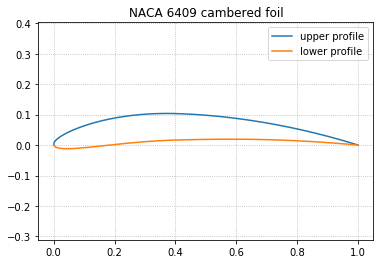

In [3]:
naca_6409 = NacaProfile(digits='6409', n_points=240, cosine_spacing=True)

plt.plot(naca_6409.xup_coordinates, naca_6409.yup_coordinates, label='upper profile')
plt.plot(naca_6409.xdown_coordinates, naca_6409.ydown_coordinates, label='lower profile')
plt.title('NACA 6409 cambered foil')
plt.grid(linestyle='dotted')
plt.axis('equal')
plt.legend()
plt.show()


We note that the cosine or linear spacing for the coordinates distribution are valid for cambered foils only, since all symmetric foils are implemented only with linear spacing.

In order to compare between both coordinate distributions, we instantiate another two objects, **linear_spacing_foil** and **cosine_spacing_foil**, which correspond to a NACA 2412 cambered foil with linear spacing and cosine spacing, respectively; then we print the coordinates for both objects. We generate both foils with 5 points only for each surface so that we can easily compare the data.

From the resulted plots, we conclude that both coordinates distributions yield exactly the same profile, even if the coordinates of the discrete points are not the same for each coordinates distribution style.

X_up (linear):  [0.   0.25 0.5  0.75 1.  ]
X_up (cosine):  [0.         0.24777378 0.50058731 0.75121259 1.        ]

Y_up (linear):  [ 0.00000000e+00  7.65950000e-02  7.23059464e-02  4.43988349e-02
 -1.66533454e-17]
Y_up (cosine):  [ 0.00000000e+00  7.65532731e-02  7.23026837e-02  4.43752657e-02
 -1.66164608e-17]

X_down (linear):  [0.   0.25 0.5  0.75 1.  ]
X_down (cosine):  [0.         0.25222622 0.49941269 0.74878741 1.        ]

Y_down (linear):  [ 0.00000000e+00 -4.22200000e-02 -3.34170576e-02 -1.80099460e-02
  1.66533454e-17]
Y_down (cosine):  [ 0.00000000e+00 -4.21782731e-02 -3.34137948e-02 -1.79863768e-02
  1.66164608e-17]


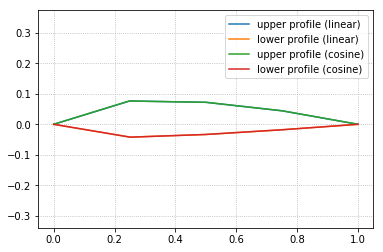

In [4]:
linear_spacing_foil = NacaProfile(digits='2412', n_points=5, cosine_spacing=False)
cosine_spacing_foil = NacaProfile(digits='2412', n_points=5, cosine_spacing=True)

print('X_up (linear): ', linear_spacing_foil.xup_coordinates)
print('X_up (cosine): ', cosine_spacing_foil.xup_coordinates)

print('\nY_up (linear): ', linear_spacing_foil.yup_coordinates)
print('Y_up (cosine): ', cosine_spacing_foil.yup_coordinates)

print('\nX_down (linear): ', linear_spacing_foil.xdown_coordinates)
print('X_down (cosine): ', cosine_spacing_foil.xdown_coordinates)

print('\nY_down (linear): ', linear_spacing_foil.ydown_coordinates)
print('Y_down (cosine): ', cosine_spacing_foil.ydown_coordinates)

plt.plot(linear_spacing_foil.xup_coordinates, linear_spacing_foil.yup_coordinates, label='upper profile (linear)')
plt.plot(linear_spacing_foil.xdown_coordinates, linear_spacing_foil.ydown_coordinates, label='lower profile (linear)')

plt.plot(cosine_spacing_foil.xup_coordinates, cosine_spacing_foil.yup_coordinates, label='upper profile (cosine)')
plt.plot(cosine_spacing_foil.xdown_coordinates, cosine_spacing_foil.ydown_coordinates, label='lower profile (cosine)')

plt.grid(linestyle='dotted')
plt.axis('equal')
plt.legend()
plt.show()


Now we proceed by computing some of the foil geometric features. We start by computing the chord line as well as plotting it.

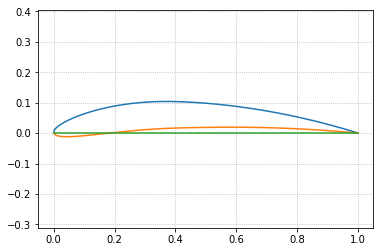

In [5]:
naca_6409.compute_chord_line(n_interpolated_points=None)
naca_6409.plot(profile=True, chord_line=True, camber_line=False, ref_point=False, outfile=None)


Now we compute and plot the camber line. Suppose we need to compute the camber coordinates but with 480 not just the default 240 points, then we can perform interpolation by specifying an integer to the argument `n_interpolated_points` in the method.

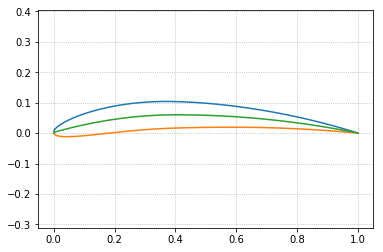

In [6]:
naca_6409.compute_camber_line(n_interpolated_points=480)
naca_6409.plot(profile=True, chord_line=False, camber_line=True, ref_point=False, outfile=None)


To plot the reference point, which is the mid point of the chord line, we change the truth value of the corresponding argument in the plot method.

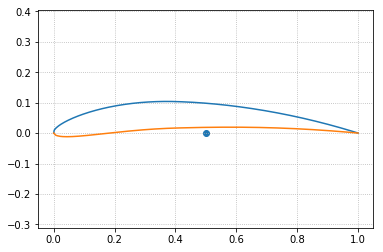

In [7]:
naca_6409.plot(profile=True, chord_line=False, camber_line=False, ref_point=True, outfile=None)

Finally we print the values of the chord length, the maximum thickness, the maximum camber, and the leading and trailing edge coordinates, through the following script.

In [8]:
print('NACA 6409 max thickness: ', naca_6409.max_thickness(n_interpolated_points=None))
print('NACA 6409 max camber: ', naca_6409.max_camber(n_interpolated_points=None))
print('NACA 6409 chord length: ', naca_6409.chord_length)
print('NACA 6409 leading edge: ', naca_6409.leading_edge)
print('NACA 6409 trailing edge: ', naca_6409.trailing_edge)

NACA 6409 max thickness:  0.09028078486024707
NACA 6409 max camber:  0.06000007200019134
NACA 6409 chord length:  1.0
NACA 6409 leading edge:  [0. 0.]
NACA 6409 trailing edge:  [1. 0.]


### NACA-5 series and custom profiles

The profile generation using NACA-5 series or using custom data are both explained below, provided that all the previous demosntrations still apply to the following two classes.

The NACA 24112 is generated through the object **naca_24112**

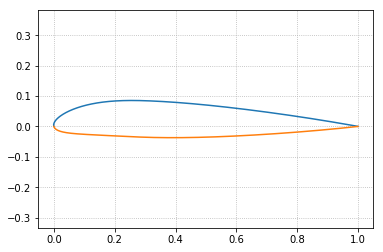

In [9]:
naca_24112 = NacaProfile(digits='24112', n_points=1000, cosine_spacing=True)
naca_24112.plot()

For generating a custom profile, we need to know the coordinates in advance. 

By knowing the coordinates of the Boeing 707 airfoil (which are stored in 'data/boeing_707.csv' file), then we can instantiate the abject **boeing_707** of the class `CustomProfile`, and we pass the coordinates to the arguments `xup`, `yup`, `xdown`, `ydown` as follows

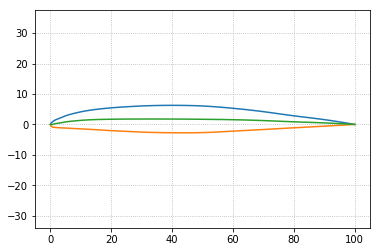

In [10]:
# Read the data file and then assign to the coordinates variables
xup = np.zeros(61)
yup = np.zeros(61)
xdown = np.zeros(61)
ydown = np.zeros(61)

with open("data/boeing_707.csv", "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines[1:62]):
    xup[i] = float(line)

for i, line in enumerate(lines[64:125]):
    yup[i] = float(line)

for i, line in enumerate(lines[127:188]):
    xdown[i] = float(line)

for i, line in enumerate(lines[190:251]):
    ydown[i] = float(line)

# Instantiate the class object
boeing_707 = CustomProfile(xup=xup, yup=yup, xdown=xdown, ydown=ydown)

boeing_707.compute_camber_line()

boeing_707.plot(profile=True, chord_line=False, camber_line=True, ref_point=False)
